In [1]:
!pip install zipfile36

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from zipfile import ZipFile

In [4]:
with ZipFile('/content/Copy of devnagari digit.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/devnagari_digit')

In [5]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


Task 1: Data Preparation

Loading the Data

• Download the provided folder that contains the Devnagari digits dataset.

• Use the Python Imaging Library (PIL) to load and read the image files from the dataset.

• Convert the images into Numpy arrays and normalize them to a range of 0-1.

• use train folder for training and test for testing.

• Extract the corresponding labels for each image.

Hints:

• Ensure that the images are resized to a consistent shape (e.g., 28x28).

• Convert labels to one-hot encoded format for multi-class classification.

Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


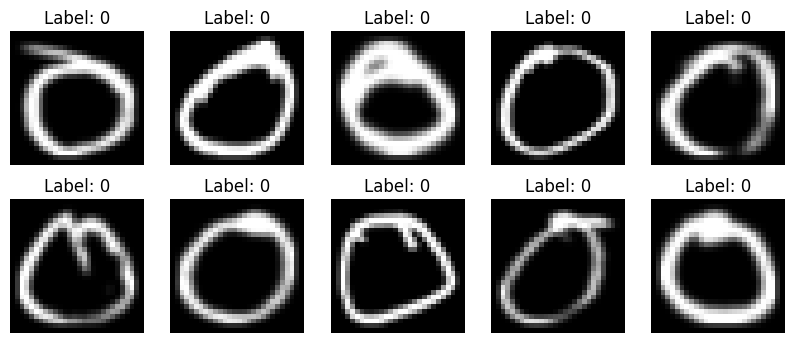

In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow


# Define paths
train_dir = '/content/devnagari_digit/DevanagariHandwrittenDigitDataset/Train'
test_dir = '/content/devnagari_digit/DevanagariHandwrittenDigitDataset/Test'

# Define image size
img_height, img_width = 28, 28
# Function to load images and labels using PIL
def load_images_from_folder(folder):
  images = []
  labels = []
  class_names = sorted(os.listdir(folder)) # Sorted class names (digit_0, digit_1, ...)
  class_map = {name: i for i, name in enumerate(class_names)} # Map class names to labels
  for class_name in class_names:
    class_path = os.path.join(folder, class_name)
    label = class_map[class_name]
    for filename in os.listdir(class_path):
      img_path = os.path.join(class_path, filename)
      # Load image using PIL
      img = Image.open(img_path).convert("L") # Convert to grayscale
      img = img.resize((img_width, img_height)) # Resize to (28,28)
      img = np.array(img) / 255.0 # Normalize pixel values to [0,1]
      images.append(img)
      labels.append(label)
  return np.array(images), np.array(labels)
# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)
# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1) # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")
# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
  plt.title(f"Label: {np.argmax(y_train[i])}")
  plt.axis("off")
plt.show()

Task 2:
Build the FCN Model

Model Architecture

• Create a Sequential model using Keras.

• Add 3 hidden layers with the following number of neurons:

– 1st hidden layer: 64 neurons

– 2nd hidden layer: 128 neurons

– 3rd hidden layer: 256 neurons

• Use sigmoid activation functions for all hidden layers.

• Add an output layer with 10 units with softmax (since Devnagari digits have 10 classes) and a
softmax activation function.

In [7]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
[
keras.layers.Input(shape=input_shape),
keras.layers.Flatten(), # Flatten the 28x28 image to a 784-dimensional vector
keras.layers.Dense(64, activation="sigmoid"),
keras.layers.Dense(128, activation="sigmoid"),
keras.layers.Dense(256, activation="sigmoid"),
keras.layers.Dense(num_classes, activation="softmax"),
]
)

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

Task 3:
 Compile the Model

Model Compilation

• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

In [9]:
model.compile(
   optimizer="sgd", # Stochastic Gradient Descent
   loss="categorical_crossentropy", # Loss function for multi-class classification
   metrics=["accuracy"] # Track accuracy during training
)

Task 4: Train the Model

Model Training

• Use the model.fit() function to train the model. Set the batch size to 128 and the number of
epochs to 20.

• Use validation split (validation split=0.2) to monitor the model’s performance on validation
data.

• Optionally, use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model
and avoiding overfitting.

In [10]:
batch_size = 128
epochs = 20
# Callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.1143 - loss: 2.3088 - val_accuracy: 0.0000e+00 - val_loss: 3.9844
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1180 - loss: 2.1924 - val_accuracy: 0.0000e+00 - val_loss: 4.4299
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1191 - loss: 2.1850 - val_accuracy: 0.0000e+00 - val_loss: 4.7048
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1248 - loss: 2.1850 - val_accuracy: 0.0000e+00 - val_loss: 4.8857
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1333 - loss: 2.1808 - val_accuracy: 0.0000e+00 - val_loss: 5.0346


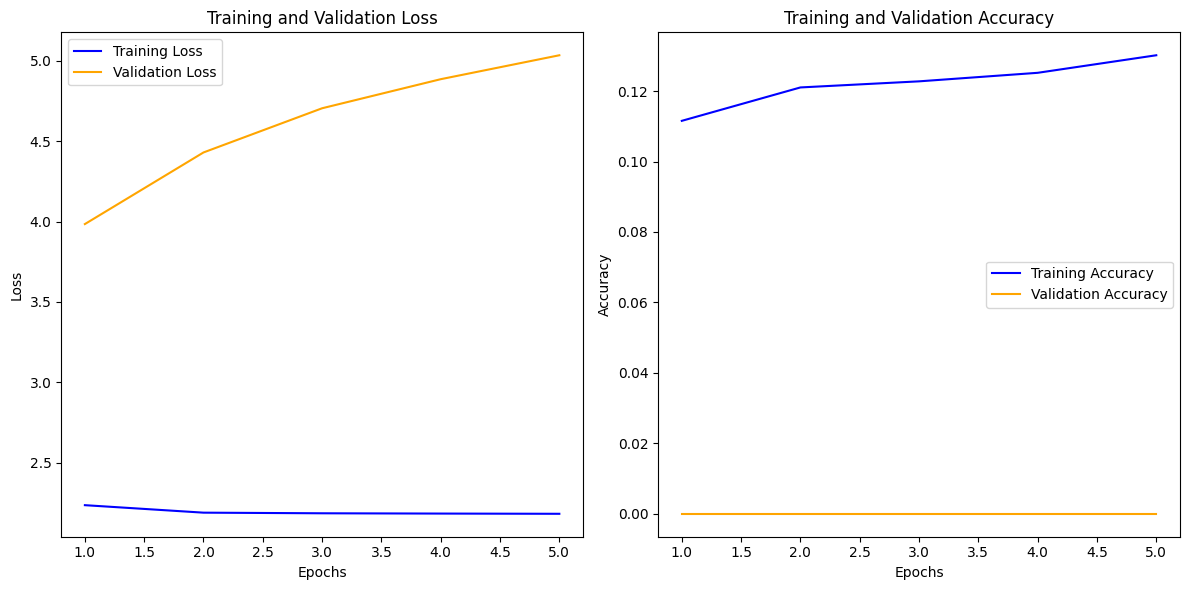

In [11]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Task 5: Evaluate the Model

Model Evaluation

• After training, evaluate the model using model.evaluate() on the test set to check the test
accuracy and loss.

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.1413 - loss: 2.6086
Test accuracy: 0.1413


Task 6: Save and Load the Model

Model Saving and Loading

• Save the trained model to an .h5 file using model.save().

• Load the saved model and re-evaluate its performance on the test set.

In [13]:
#Saving the Model
model.save('mnist_fully_connected_model.h5')
#Loading the modle
loaded_model = tf.keras.models.load_model('mnist_fully_connected_model.h5')

Task 7: Predictions

Making Predictions

• Use model.predict() to make predictions on test images.

• Convert the model’s predicted probabilities to digit labels using np.argmax().

In [14]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted label for first image: 5
True label for first image: 0
